In [2]:
#Milk Quality Prediction

#Loading dataset
import numpy as np 
import pandas as pd 
df=pd.read_csv("milknew.csv")
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [3]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
df.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [ ]:
#Find the dimensions of the dataframe
df.shape

(1059, 8)

In [6]:
#checking data types
df.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object

In [ ]:
#Checking columns
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [23]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [9]:
df['Grade'].value_counts()

Grade
low       429
medium    374
high      256
Name: count, dtype: int64

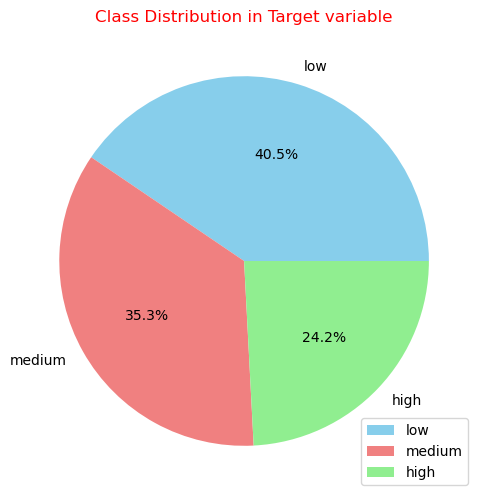

In [ ]:
#A pie chart is drawn using matplotlib to visualize the class distribution of the "Grade" column in a dataset.
import matplotlib.pyplot as plt
class_counts=df['Grade'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts,labels=class_counts.index,autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title("Class Distribution in Target variable",c='r')
plt.legend(loc='lower right')

In [11]:
#Checking count of missing values in each column
df.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

data has no missing value

In [12]:
#Splitting input and output as arrays on x and y
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [13]:
#Splitting data into training data and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [14]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-0.01122953, -0.1179238 , -1.08012345, ...,  0.72435582,
        -0.95641449, -0.44430459],
       [-0.08057188, -0.6077306 ,  0.9258201 , ..., -1.38053698,
        -0.95641449,  0.72733135],
       [-0.01122953, -0.70569196,  0.9258201 , ...,  0.72435582,
         1.04557178,  0.72733135],
       ...,
       [-1.32873411, -0.6077306 ,  0.9258201 , ...,  0.72435582,
        -0.95641449,  0.72733135],
       [ 1.65298678, -0.1179238 ,  0.9258201 , ...,  0.72435582,
         1.04557178, -0.44430459],
       [-0.08057188, -0.6077306 ,  0.9258201 , ..., -1.38053698,
        -0.95641449,  0.72733135]])

In [15]:
#Model creation
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array(['high', 'low', 'medium', 'low', 'high', 'medium', 'low', 'high',
       'high', 'medium', 'low', 'high', 'medium', 'medium', 'high',
       'medium', 'medium', 'medium', 'high', 'low', 'high', 'low',
       'medium', 'high', 'high', 'low', 'high', 'high', 'low', 'medium',
       'high', 'low', 'low', 'medium', 'high', 'high', 'low', 'high',
       'high', 'low', 'high', 'medium', 'high', 'low', 'medium', 'low',
       'high', 'low', 'medium', 'low', 'high', 'medium', 'medium',
       'medium', 'low', 'medium', 'medium', 'low', 'medium', 'low',
       'medium', 'low', 'medium', 'high', 'low', 'medium', 'low',
       'medium', 'medium', 'high', 'high', 'medium', 'medium', 'high',
       'medium', 'medium', 'medium', 'low', 'high', 'medium', 'low',
       'low', 'medium', 'low', 'medium', 'medium', 'high', 'low', 'high',
       'low', 'medium', 'high', 'medium', 'low', 'high', 'medium', 'low',
       'high', 'medium', 'medium', 'medium', 'medium', 'low', 'medium',
       'high', 'h

In [16]:
#Predict output for a random value
print(knn.predict(scaler.transform([[6.6,37,0,0,0,0,255]])))

['medium']


In [17]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 79,   0,   7],
       [  2, 112,   2],
       [  0,   1, 115]], dtype=int64)

In [18]:
#Displaying confusion matrix
#labels order check from y_train
y_train

array(['medium', 'medium', 'high', 'low', 'low', 'medium', 'medium',
       'high', 'low', 'high', 'low', 'low', 'high', 'low', 'medium',
       'low', 'medium', 'high', 'medium', 'medium', 'low', 'low',
       'medium', 'high', 'low', 'low', 'high', 'medium', 'high', 'low',
       'low', 'low', 'high', 'medium', 'medium', 'low', 'medium',
       'medium', 'high', 'low', 'low', 'low', 'low', 'high', 'high',
       'high', 'low', 'medium', 'low', 'medium', 'medium', 'medium',
       'high', 'medium', 'low', 'high', 'medium', 'medium', 'low', 'high',
       'medium', 'high', 'medium', 'low', 'low', 'medium', 'low', 'low',
       'low', 'medium', 'medium', 'low', 'medium', 'high', 'low', 'low',
       'medium', 'low', 'low', 'low', 'low', 'medium', 'medium', 'medium',
       'medium', 'high', 'medium', 'low', 'medium', 'low', 'high',
       'medium', 'low', 'low', 'medium', 'low', 'high', 'medium', 'low',
       'low', 'low', 'medium', 'low', 'medium', 'low', 'medium', 'medium',
       'l

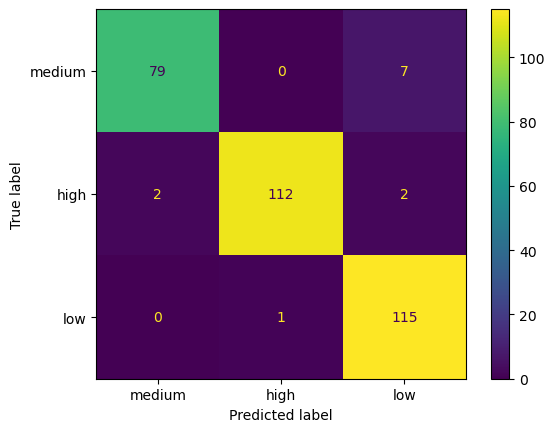

In [19]:

from sklearn.metrics import ConfusionMatrixDisplay
labels=['medium','high','low']
cmd=ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()

In [20]:
#Accuracy score
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.9622641509433962

In [21]:
train_accuracy =accuracy_score(y_train, knn.predict(x_train))
train_accuracy

0.9878542510121457

In [22]:
#Classification report based on training and testing data
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

        high       0.98      0.92      0.95        86
         low       0.99      0.97      0.98       116
      medium       0.93      0.99      0.96       116

    accuracy                           0.96       318
   macro avg       0.96      0.96      0.96       318
weighted avg       0.96      0.96      0.96       318

